In [1]:
from all_imports import *

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from ptbds import *

In [4]:
from nets import *

In [5]:
tfms

([<fastai.transforms.Normalize object at 0x7fcbb1034860>, <ptbds.ChannelOrder1d object at 0x7fcbb10349e8>],
 [<fastai.transforms.Normalize object at 0x7fcbb1034860>, <ptbds.ChannelOrder1d object at 0x7fcbb1034978>])

In [11]:
def actual_acc(preds, targs):
    preds = torch.max(preds, dim=1)[1]
    corr = 0
    tot = 0
    for j in np.arange(0, len(preds), 50):
        acc1 = (preds==targs).float().mean()
        if acc1 >= 0.5:
            corr += 1
        tot += 1
    return corr / tot

In [19]:
snt_mdl = get_senet_small()

learn = ConvLearner.from_model_data(snt_mdl, data)

In [17]:
learn.lr_find()

 90%|█████████ | 152/168 [00:11<00:01, 12.67it/s, loss=0.515]


In [22]:
x, y = next(iter(data.val_dl))

In [23]:
x.shape

torch.Size([16, 15, 149])

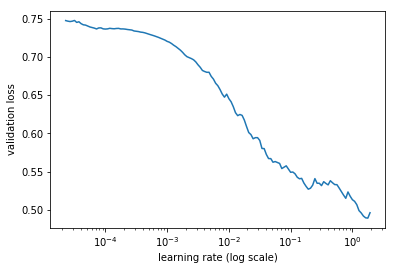

In [18]:
learn.sched.plot()

In [21]:
learn.fit(1e-1, 2, cycle_len=10, best_save_name='mlcnn3_ecg1', metrics=[accuracy, actual_acc])

epoch      trn_loss   val_loss   accuracy   actual_acc        
    0      0.072441   0.308208   0.915952   0.912381  
    1      0.07266    0.278009   0.943571   0.946667          
    2      0.056093   0.331874   0.93381    0.939048          
    3      0.051259   0.349431   0.93119    0.931429          
    4      0.05018    0.38464    0.928571   0.931429          
    5      0.053966   0.328896   0.931429   0.931429          
    6      0.05597    0.37056    0.932143   0.942857          
    7      0.04146    0.375775   0.92619    0.927619          
    8      0.036133   0.363199   0.930476   0.931429          
    9      0.032318   0.391276   0.928571   0.935238          
    10     0.07041    0.314672   0.925952   0.931429          
    11     0.057278   0.372474   0.923095   0.931429          
    12     0.042926   0.318374   0.927143   0.931429          
    13     0.043646   0.405414   0.92119    0.931429          
    14     0.041953   0.420477   0.928333   0.931429          


[array([0.39406]), 0.9238095238095239, 0.9276190476190476]

In [ ]:
%debug

In [ ]:
get_scores(learn)

In [ ]:
learn.load('mlcnn_ecg1')

In [ ]:
get_scores(learn)